In [7]:
import csv
import shutil
import pandas as pd
import tensorflow as tf
import librosa
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, LayerNormalization, Dropout ,Conv2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
from sklearn.utils import shuffle
#---
import matplotlib.pyplot as plt
import os
from tensorflow import keras

In [2]:
def audio_to_mfccs(filename, sample_rate=44100, offset=0, duration=None ,edit=True):
    voice, sample_rate = librosa.load(filename, sr=sample_rate, offset=offset, duration=duration)
    n_fft = int(16/1000 * sample_rate)  # Convert 16 ms to samples
    hop_length = int(8/1000 * sample_rate)  # Convert 8 ms to samples
    mfcc_feature = librosa.feature.mfcc(y=voice, sr=sample_rate, n_mfcc=13, n_fft=n_fft, hop_length=hop_length)
    
    # mfccs_cvn = (mfcc_feature - np.mean(mfcc_feature, axis=1, keepdims=True)) / np.std(mfcc_feature, axis=1, keepdims=True)
    delta_mfcc_feature = librosa.feature.delta(mfcc_feature)
    
    mfccs = np.concatenate((mfcc_feature, delta_mfcc_feature))
    mfccs_features = np.transpose(mfccs)  # all frames
    if(edit):
        print(len(mfccs_features))
        if(len(mfccs_features)==376):
            return mfccs_features[95:95+200+1]
        elif(len(mfccs_features)==251):
            return mfccs_features[33:33+200+1]
        else:
            return -1
    else:
        return mfccs_features

In [ ]:
'''
mfcc = audio_to_mfccs("")
print(mfcc.shape)
plt.plot(mfcc)
plt.show()
'''
dirpath = "Training_Dataset/training_voice_data"
len_list = []
for i in os.listdir(dirpath):    
    mfcc = audio_to_mfccs(f"Training_Dataset/training_voice_data/{i}")
    if(type(mfcc)!=int):
        plt.plot(mfcc)
        plt.show()

In [4]:
dirpath = "Training_Dataset/training_voice_data"
len_list = []
for i in os.listdir(dirpath):    
    mfcc = audio_to_mfccs(f"Training_Dataset/training_voice_data/{i}")
    len_list.append(len(mfcc)*8)
    #print(i + ":" + str(len(mfcc)*8))

#plt.plot(mfcc[:1000])
#plt.show()


251
376
376
376
376
126


TypeError: object of type 'int' has no len()

In [60]:
audio_total = np.array(len_list).shape

audio_3s=np.sum(np.array(len_list)==2608)
audio_2s=np.sum(np.array(len_list)==1608)
audio_1s=np.sum(np.array(len_list)==608)
print(f'3s: {audio_3s} , {audio_3s/audio_total*100}')
print(f'2s: {audio_2s} , {audio_2s/audio_total*100}')
print(f'1s: {audio_1s} , {audio_1s/audio_total*100}')

3s: 618 , [61.8]
2s: 327 , [32.7]
1s: 39 , [3.9]


In [8]:
mfcc = audio_to_mfccs("Training_Dataset/training_voice_data/0A00gqr.wav")
tf.reshape(mfcc,[-1])
plt.plot(np.reshape(mfcc,6526))
plt.figure(figsize=(20, 400))
#plt.xlim(0,80000)
#plt.ylim(-0.5,2.5)
#plt.plot(mfcc)
plt.show()


251


ValueError: cannot reshape array of size 5226 into shape (6526,)

251


<Figure size 2000x40000 with 0 Axes>

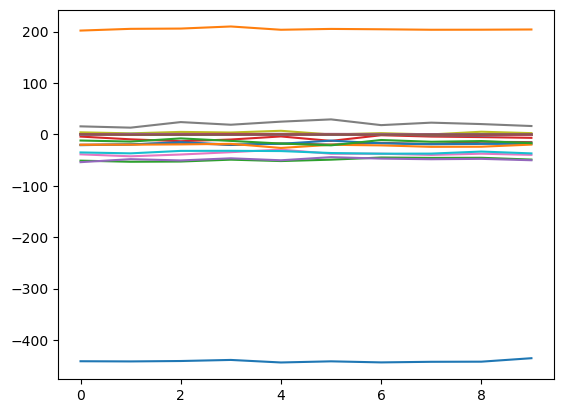

<Figure size 2000x40000 with 0 Axes>

In [11]:
mfcc = audio_to_mfccs("Training_Dataset/training_voice_data/0A00gqr.wav")
plt.plot(mfcc[:10])
plt.figure(figsize=(20, 400))

In [3]:
MODEL_SAVE_NAME = "AI_CUP_acoustic_sample_model"

# default hyperparameters
NEURONS = 300
HIDDEN_LAYERS = 3
INPUT_SHAPE = (224, 224, 3) 

input_shape=INPUT_SHAPE; neurons = NEURONS; hidden_layers = HIDDEN_LAYERS; learning_rate = 0.001; verbose=0


model = Sequential()
#model.add(Dense(neurons, input_dim=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='tanh', input_shape=(16)))
model.add(Dropout(0.1))
for i in range(hidden_layers-1):
    model.add(Dense(neurons,activation='relu'))

model.add(Dense(5))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

if verbose:
    model.summary()



TypeError: 'int' object is not iterable